In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [0]:
batch_size = 64
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [8]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



history= model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 572s 11ms/step - loss: 1.8670 - acc: 0.3180 - val_loss: 1.6093 - val_acc: 0.4205
Epoch 2/10
50000/50000 [==============================] - 570s 11ms/step - loss: 1.5796 - acc: 0.4250 - val_loss: 1.5025 - val_acc: 0.4590
Epoch 3/10
50000/50000 [==============================] - 572s 11ms/step - loss: 1.4539 - acc: 0.4755 - val_loss: 1.4035 - val_acc: 0.4991
Epoch 4/10
50000/50000 [==============================] - 573s 11ms/step - loss: 1.3700 - acc: 0.5085 - val_loss: 1.3154 - val_acc: 0.5346
Epoch 5/10
50000/50000 [==============================] - 564s 11ms/step - loss: 1.3002 - acc: 0.5335 - val_loss: 1.2545 - val_acc: 0.5545
Epoch 6/10
50000/50000 [==============================] - 516s 10ms/step - loss: 1.2463 - acc: 0.5556 - val_loss: 1.1575 - val_acc: 0.5939
Epoch 7/10
50000/50000 [==============================] - 551s 11ms/step - loss: 1.1978 - acc: 0.5739 - val_loss: 1.

10000/10000 [==============================] - 33s 3ms/step

Test loss: 1.0781497948646546
Test accuracy: 0.6245


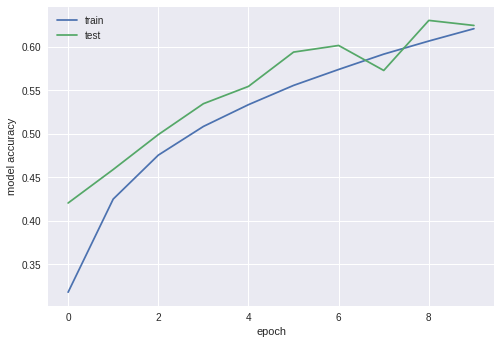

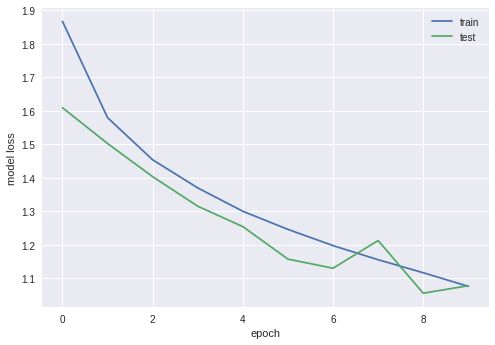

In [9]:
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#  look into training history

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()